     |████████████████████████████████| 1.5MB 15.7MB/s eta 0:00:01
     |████████████████████████████████| 921kB 15.3MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 24.9MB/s eta 0:00:01
     |████████████████████████████████| 11.9MB 31.6MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


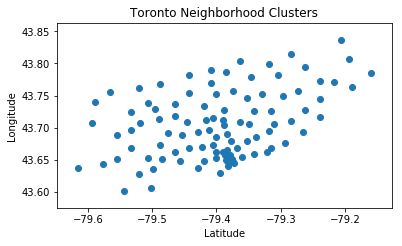

In [1]:
! pip install wikipedia
! pip install shapely
! pip install geopandas

%matplotlib inline
import requests
import io
import wikipedia as wp
import pandas as pd 
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df = df[df.Borough != 'Not assigned']
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]

df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

plt.title('Toronto Neighborhood Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

gdf.plot(ax=ax)
plt.show()